In [27]:
import pandas as pd

raw_df = pd.read_csv(r'music_최종.csv', parse_dates=['발매일'], encoding='cp949')
raw_df.head()

,순위,제목,가수,가사,장르,발매일,Month
0,1,사랑을 했다 (LOVE SCENARIO),iKON,사랑을 했다 우리가 만나 지우지 못할 추억이 됐다 볼만한 멜로드라마 괜찮은 결말 그...,랩/힙합,2018-01-25,201803
1,2,별이 빛나는 밤,마마무 (Mamamoo),손끝이 시리더니 벌써 봄이 왔네 꿈같은 바람이 불어 곳곳에 여느 때 와는 다른 듯한...,댄스,2018-03-07,201803
2,3,뿜뿜,모모랜드 (MOMOLAND),설레어 너와 나의 랑데뷰 랑데뷰 내 마음을 들었다 놨다 해 맘대루 맘대루 지금 내 ...,댄스,2018-01-03,201803
3,4,그날처럼,장덕철,참 많은 시간이 흘러가고 넌 어떻게 사는지 참 궁금해 날 걱정하는 사람들에게 다 잊...,발라드,2017-11-28,201803
4,5,꽃 길,BIGBANG (빅뱅),그땐 참 좋았는데 말이야 너와 함께할 수만 있다면 때론 외롭고 슬퍼도 말이야 너와 ...,R&B/Soul,2018-03-13,201803


In [28]:
top6_genre = raw_df['장르'].value_counts().head(6).index
top6_genre

Index(['발라드', '댄스', '랩/힙합', '발라드, 국내드라마', 'R&B/Soul', '록/메탈'], dtype='object', name='장르')

In [29]:
df = raw_df[raw_df['장르'].isin(top6_genre)]
df.head()

,순위,제목,가수,가사,장르,발매일,Month
0,1,사랑을 했다 (LOVE SCENARIO),iKON,사랑을 했다 우리가 만나 지우지 못할 추억이 됐다 볼만한 멜로드라마 괜찮은 결말 그...,랩/힙합,2018-01-25,201803
1,2,별이 빛나는 밤,마마무 (Mamamoo),손끝이 시리더니 벌써 봄이 왔네 꿈같은 바람이 불어 곳곳에 여느 때 와는 다른 듯한...,댄스,2018-03-07,201803
2,3,뿜뿜,모모랜드 (MOMOLAND),설레어 너와 나의 랑데뷰 랑데뷰 내 마음을 들었다 놨다 해 맘대루 맘대루 지금 내 ...,댄스,2018-01-03,201803
3,4,그날처럼,장덕철,참 많은 시간이 흘러가고 넌 어떻게 사는지 참 궁금해 날 걱정하는 사람들에게 다 잊...,발라드,2017-11-28,201803
4,5,꽃 길,BIGBANG (빅뱅),그땐 참 좋았는데 말이야 너와 함께할 수만 있다면 때론 외롭고 슬퍼도 말이야 너와 ...,R&B/Soul,2018-03-13,201803


In [30]:
df_genre = df.groupby('장르')

ballade = df_genre.get_group('발라드')
dance = df_genre.get_group('댄스')
rap = df_genre.get_group('랩/힙합')
drama = df_genre.get_group('발라드, 국내드라마')
rnb = df_genre.get_group('R&B/Soul')
rock = df_genre.get_group('록/메탈')


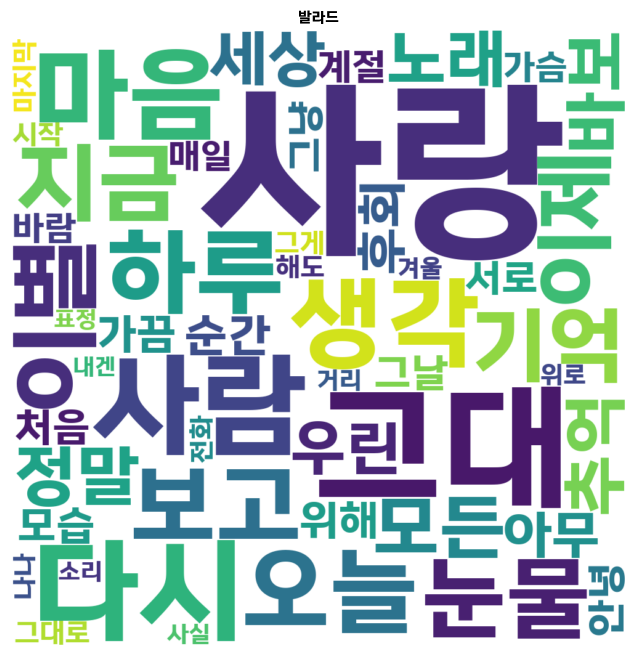

In [31]:
# 발라드

import pandas as pd
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
from wordcloud import WordCloud
import matplotlib.font_manager as fm


# 중복 제거
ballade = ballade.drop_duplicates(subset=['가사'])

# 불용어 파일 읽기
with open('stopwords.txt', 'r', encoding='utf-8') as file:
    stop_words = file.readlines()
    stop_words = [word.strip() for word in stop_words]

okt = Okt()

#불용어 제거
def extract_nouns(text):
    nouns = okt.nouns(text)
    return [word for word in nouns if word not in stop_words and len(word) > 1]

ballade['가사_명사'] = ballade['가사'].astype(str).apply(extract_nouns)

all_nouns = ballade['가사_명사'].sum()

# Counter를 사용하여 명사 빈도 계산
count_nouns_ballade = Counter(all_nouns)

font_path= "/Users/yoosukyeong/Library/Fonts/LeferiPointBlack.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
#상위 50 출력
top_nouns = dict(count_nouns_ballade.most_common(50))

wc = WordCloud(font_path, background_color='white',  \
	width=1000, \
	height=1000, \
	max_words=100, \
	max_font_size=300)
wc.generate_from_frequencies(top_nouns)

plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('발라드', fontsize=50, fontproperties=font_manager.FontProperties(fname=font_path))
plt.axis('off')
plt.show()


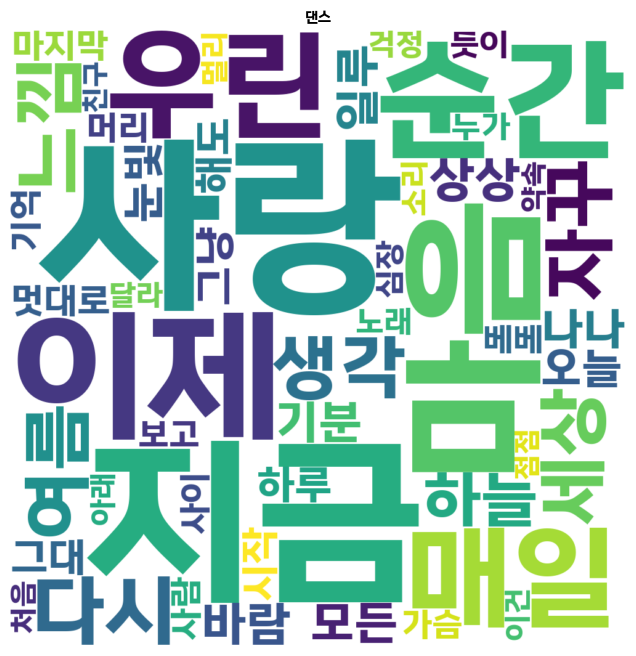

In [32]:
# 댄스

import pandas as pd
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
from wordcloud import WordCloud
import matplotlib.font_manager as fm


# 중복 제거
dance = dance.drop_duplicates(subset=['가사'])

# 불용어 파일 읽기
with open('stopwords.txt', 'r', encoding='utf-8') as file:
    stop_words = file.readlines()
    stop_words = [word.strip() for word in stop_words]

okt = Okt()

#불용어 제거
def extract_nouns(text):
    nouns = okt.nouns(text)
    return [word for word in nouns if word not in stop_words and len(word) > 1]

dance['가사_명사'] = dance['가사'].astype(str).apply(extract_nouns)

all_nouns = dance['가사_명사'].sum()

# Counter를 사용하여 명사 빈도 계산
count_nouns_dance = Counter(all_nouns)

font_path= "/Users/yoosukyeong/Library/Fonts/LeferiPointBlack.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
#상위 50 출력
top_nouns = dict(count_nouns_dance.most_common(50))

wc = WordCloud(font_path, background_color='white',  \
	width=1000, \
	height=1000, \
	max_words=100, \
	max_font_size=300)
wc.generate_from_frequencies(top_nouns)

plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('댄스', fontsize=50, fontproperties=font_manager.FontProperties(fname=font_path))
plt.axis('off')
plt.show()

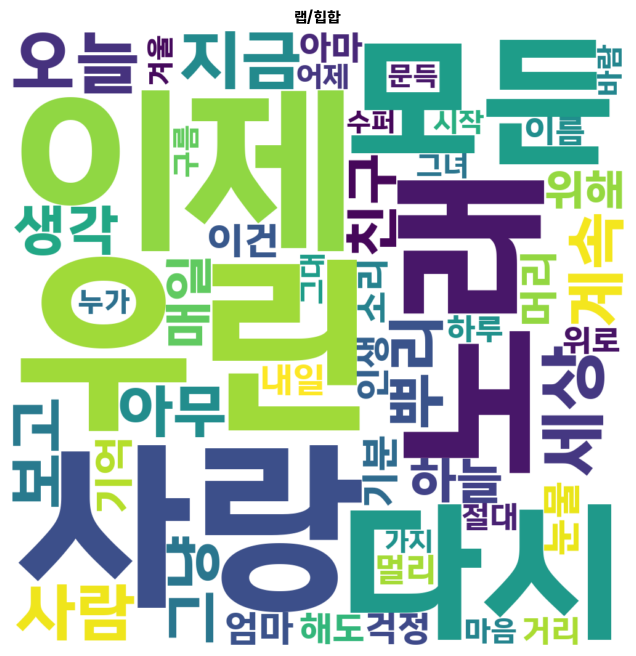

In [33]:
# 랩/힙합

import pandas as pd
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
from wordcloud import WordCloud
import matplotlib.font_manager as fm


# 중복 제거
rap = rap.drop_duplicates(subset=['가사'])

# 불용어 파일 읽기
with open('stopwords.txt', 'r', encoding='utf-8') as file:
    stop_words = file.readlines()
    stop_words = [word.strip() for word in stop_words]

okt = Okt()

#불용어 제거
def extract_nouns(text):
    nouns = okt.nouns(text)
    return [word for word in nouns if word not in stop_words and len(word) > 1]

rap['가사_명사'] = rap['가사'].astype(str).apply(extract_nouns)

all_nouns = rap['가사_명사'].sum()

# Counter를 사용하여 명사 빈도 계산
count_nouns_rap = Counter(all_nouns)

font_path= "/Users/yoosukyeong/Library/Fonts/LeferiPointBlack.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
#상위 50 출력
top_nouns = dict(count_nouns_rap.most_common(50))

wc = WordCloud(font_path, background_color='white',  \
	width=1000, \
	height=1000, \
	max_words=100, \
	max_font_size=300)
wc.generate_from_frequencies(top_nouns)

plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('랩/힙합', fontsize=50, fontproperties=font_manager.FontProperties(fname=font_path))
plt.axis('off')
plt.show()

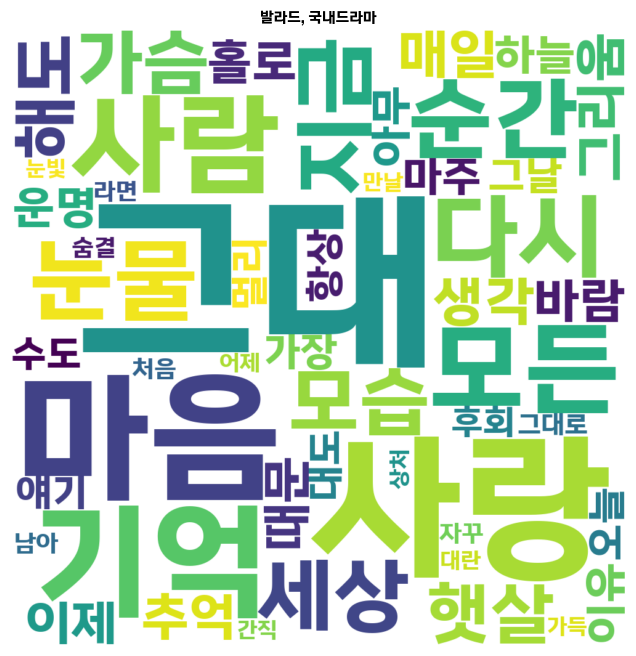

In [34]:
# 발라드, 국내드라마

import pandas as pd
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
from wordcloud import WordCloud
import matplotlib.font_manager as fm


# 중복 제거
drama = drama.drop_duplicates(subset=['가사'])

# 불용어 파일 읽기
with open('stopwords.txt', 'r', encoding='utf-8') as file:
    stop_words = file.readlines()
    stop_words = [word.strip() for word in stop_words]

okt = Okt()

#불용어 제거
def extract_nouns(text):
    nouns = okt.nouns(text)
    return [word for word in nouns if word not in stop_words and len(word) > 1]

drama['가사_명사'] = drama['가사'].astype(str).apply(extract_nouns)

all_nouns = drama['가사_명사'].sum()

# Counter를 사용하여 명사 빈도 계산
count_nouns_drama = Counter(all_nouns)

font_path= "/Users/yoosukyeong/Library/Fonts/LeferiPointBlack.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
#상위 50 출력
top_nouns = dict(count_nouns_drama.most_common(50))

wc = WordCloud(font_path, background_color='white',  \
	width=1000, \
	height=1000, \
	max_words=100, \
	max_font_size=300)
wc.generate_from_frequencies(top_nouns)

plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('발라드, 국내드라마', fontsize=50, fontproperties=font_manager.FontProperties(fname=font_path))
plt.axis('off')
plt.show()

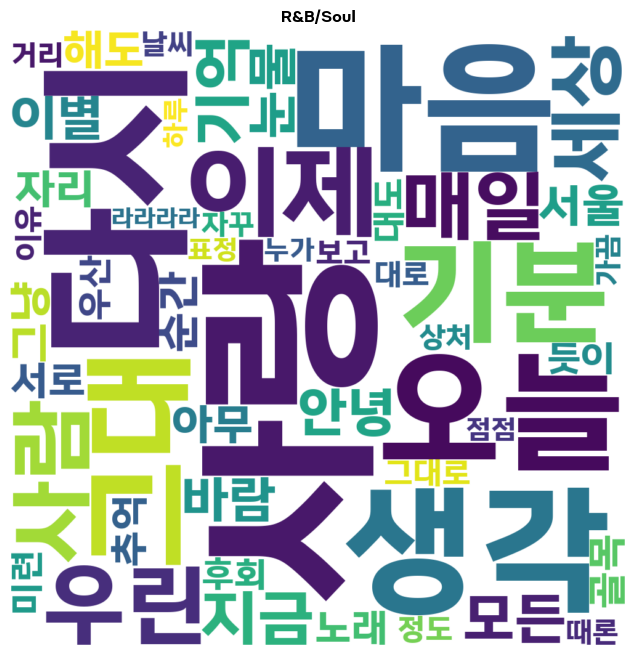

In [35]:
# R&B/Soul

import pandas as pd
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
from wordcloud import WordCloud
import matplotlib.font_manager as fm


# 중복 제거
rnb = rnb.drop_duplicates(subset=['가사'])

# 불용어 파일 읽기
with open('stopwords.txt', 'r', encoding='utf-8') as file:
    stop_words = file.readlines()
    stop_words = [word.strip() for word in stop_words]

okt = Okt()

#불용어 제거
def extract_nouns(text):
    nouns = okt.nouns(text)
    return [word for word in nouns if word not in stop_words and len(word) > 1]

rnb['가사_명사'] = rnb['가사'].astype(str).apply(extract_nouns)

all_nouns = rnb['가사_명사'].sum()

# Counter를 사용하여 명사 빈도 계산
count_nouns_rnb = Counter(all_nouns)

font_path= "/Users/yoosukyeong/Library/Fonts/LeferiPointBlack.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
#상위 50 출력
top_nouns = dict(count_nouns_rnb.most_common(50))

wc = WordCloud(font_path, background_color='white',  \
	width=1000, \
	height=1000, \
	max_words=100, \
	max_font_size=300)
wc.generate_from_frequencies(top_nouns)

plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('R&B/Soul', fontsize=50, fontproperties=font_manager.FontProperties(fname=font_path))
plt.axis('off')
plt.show()

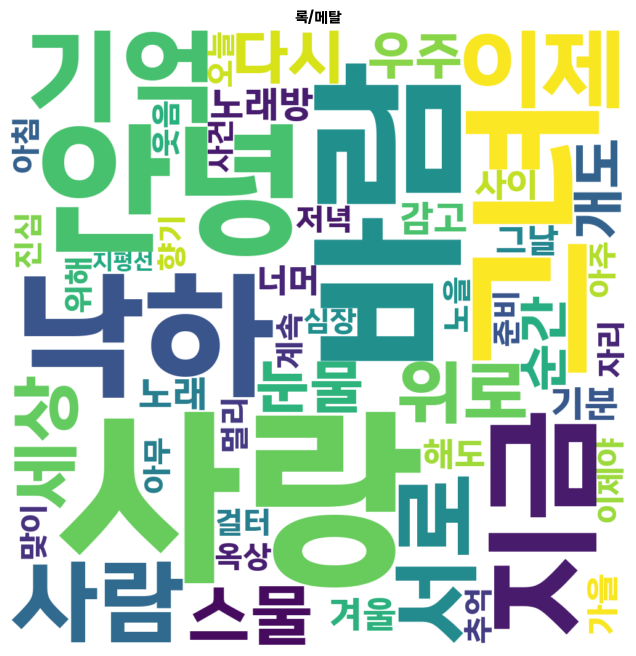

In [36]:
# 록/메탈

import pandas as pd
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
from wordcloud import WordCloud
import matplotlib.font_manager as fm


# 중복 제거
rock = rock.drop_duplicates(subset=['가사'])

# 불용어 파일 읽기
with open('stopwords.txt', 'r', encoding='utf-8') as file:
    stop_words = file.readlines()
    stop_words = [word.strip() for word in stop_words]

okt = Okt()

#불용어 제거
def extract_nouns(text):
    nouns = okt.nouns(text)
    return [word for word in nouns if word not in stop_words and len(word) > 1]

rock['가사_명사'] = rock['가사'].astype(str).apply(extract_nouns)

all_nouns = rock['가사_명사'].sum()

# Counter를 사용하여 명사 빈도 계산
count_nouns_rock = Counter(all_nouns)

font_path= "/Users/yoosukyeong/Library/Fonts/LeferiPointBlack.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
#상위 50 출력
top_nouns = dict(count_nouns_rock.most_common(50))

wc = WordCloud(font_path, background_color='white',  \
	width=1000, \
	height=1000, \
	max_words=100, \
	max_font_size=300)
wc.generate_from_frequencies(top_nouns)

plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('록/메탈', fontsize=50, fontproperties=font_manager.FontProperties(fname=font_path))
plt.axis('off')
plt.show()